# ARCH-GARCH models

ARMA models were used to model the conditional mean of a process when the conditional variance was constant.
$$\mathrm{E}\left(x_{t} \mid x_{t-1}, x_{t-2}, \ldots\right)=\phi x_{t-1}, \quad and \quad \operatorname{var}\left(x_{t} \mid x_{t-1}, x_{t-2}, \ldots\right)=\operatorname{var}\left(w_{t}\right)=\sigma_{w}^{2}$$

Models such as the autoregressive conditionally heteroscedastic (**ARCH**) model, first introduced by Engle (1982),were developed to model changes in volatility. For example, if $x_{t}$ is the value of an asset at time $t$, then the return or relative gain, $r_{t}$, of the asset at time $t$ is

$$
r_{t}=\frac{x_{t}-x_{t-1}}{x_{t-1}} .
$$

The simplest ARCH model, the ARCH(1), models the return as

$$
\begin{aligned}
r_{t} &=\sigma_{t} \epsilon_{t} \\
\sigma_{t}^{2} &=\alpha_{0}+\alpha_{1} r_{t-1}^{2}
\end{aligned}
$$

where $\sigma_{t}^{2}$ is conditional variance of $x_{t}$, and $\epsilon_{t}$ is standard Gaussian white noise, $\epsilon_{t} \sim$ iid $\mathrm{N}(0,1)$. As with ARMA models, we must impose some constraints on the model parameters to obtain desirable properties. An obvious constraint is that $\alpha_{0}, \alpha_{1} \geq 0$ because $\sigma_{t}^{2}$ is a variance.

As we shall see, the ARCH(1) models return as a white noise process with nonconstant conditional variance, and that conditional variance depends on the previous return. First, notice that the conditional distribution of $r_{t}$ given $r_{t-1}$ is Gaussian:

$$
r_{t} \mid r_{t-1} \sim \mathrm{N}\left(0, \alpha_{0}+\alpha_{1} r_{t-1}^{2}\right)
$$

In addition, it is possible to write the $\mathrm{ARCH}(1)$ model as a non-Gaussian $\mathrm{AR}(1)$ model in the square of the returns $r_{t}^{2}$. First, rewrite equations as

$$
\begin{aligned}
r_{t}^{2} &=\sigma_{t}^{2} \epsilon_{t}^{2} \\
\alpha_{0}+\alpha_{1} r_{t-1}^{2} &=\sigma_{t}^{2}
\end{aligned}
$$

and subtract the two equations to obtain

$$
r_{t}^{2}-\left(\alpha_{0}+\alpha_{1} r_{t-1}^{2}\right)=\sigma_{t}^{2} \epsilon_{t}^{2}-\sigma_{t}^{2}
$$

Now, write this equation as

$$
r_{t}^{2}=\alpha_{0}+\alpha_{1} r_{t-1}^{2}+v_{t}
$$

where $v_{t}=\sigma_{t}^{2}\left(\epsilon_{t}^{2}-1\right) .$ Because $\epsilon_{t}^{2}$ is the square of a $\mathrm{N}(0,1)$ random variable, $\epsilon_{t}^{2}-1$ is a shifted (to have mean-zero), $\chi_{1}^{2}$ random variable.

To explore the properties of ARCH, we define $\mathcal{R}_{s}=\left\{r_{s}, r_{s-1}, \ldots\right\} .$ Then, we see that $r_{t}$ has a zero mean:

$$
\mathrm{E}\left(r_{t}\right)=\mathrm{EE}\left(r_{t} \mid \mathcal{R}_{t-1}\right)=\mathrm{EE}\left(r_{t} \mid r_{t-1}\right)=0
$$

Because $\mathrm{E}\left(r_{t} \mid \mathcal{R}_{t-1}\right)=0,$ the process $r_{t}$ is said to be a martingale difference. Because $r_{t}$ is a martingale difference, it is also an uncorrelated sequence. For example, with $h>0$

$$
\begin{aligned}
\operatorname{cov}\left(r_{t+h}, r_{t}\right) &=\mathrm{E}\left(r_{t} r_{t+h}\right)=\operatorname{EE}\left(r_{t} r_{t+h} \mid \mathcal{R}_{t+h-1}\right) \\
&=\mathrm{E}\left\{r_{t} \mathrm{E}\left(r_{t+h} \mid \mathcal{R}_{t+h-1}\right)\right\}=0
\end{aligned}
$$

The last line of equation follows because $r_{t}$ belongs to the information set $\mathcal{R}_{t+h-1}$ for $h>0,$ and, $\mathrm{E}\left(r_{t+h} \mid \mathcal{R}_{t+h-1}\right)=0,$. An argument similar to previous equations will establish the fact that the error process $v_{t}$ is also a martingale difference and, consequently, an uncorrelated sequence. If the variance of $v_{t}$ is finite and constant with respect to time, and $0 \leq$ $\alpha_{1}<1,$ then equation specifies a causal AR(1) process for $r_{t}^{2}$

# Example 1

In [1]:
%matplotlib inline
from random import gauss
from random import seed
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
# create a simple white noise with increasing variance
# seed pseudorandom number generator
seed(2)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# square the dataset
squared_data = np.array([x**2 for x in data])

Text(0.5, 0, 'data^2')

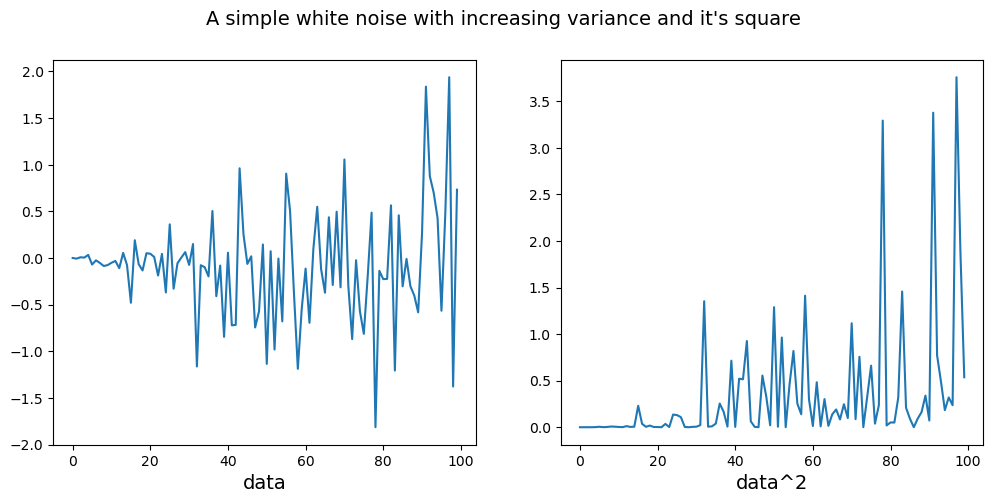

In [3]:
# plot data
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))
fig.suptitle("A simple white noise with increasing variance and it's square",size=14)
ax1.plot(data)
#ax1.set_title('This is Plot 4')
ax1.set_xlabel('data',size=14)
ax2.plot(squared_data)
ax2.set_xlabel('data^2',size=14)

C:\Users\hasmi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


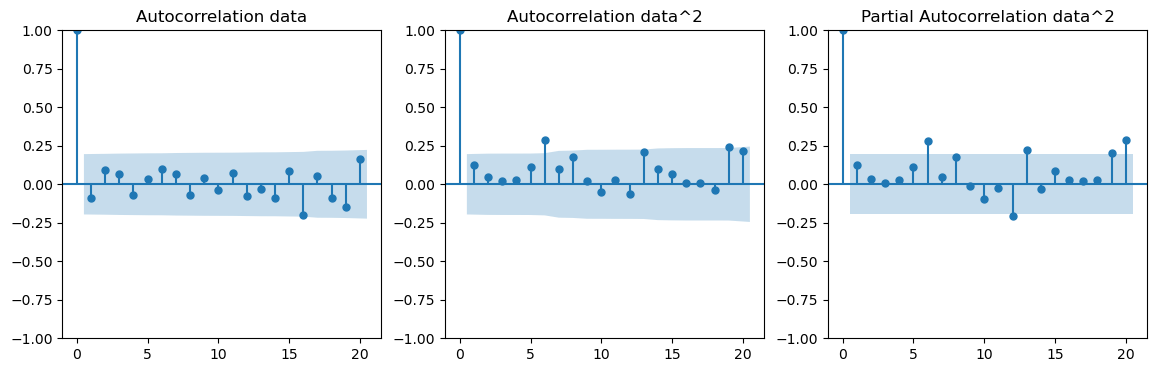

In [4]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
plot_acf(data, lags=20, ax=ax[0], title = "Autocorrelation data")
plot_acf(squared_data, lags=20, ax=ax[1], title = "Autocorrelation data^2")
plot_pacf(squared_data, lags=20, ax=ax[2], title = "Partial Autocorrelation data^2")
plt.show()

#### If an ARCH effect is found to be significant, one can use the PACF of $r^2$ to determine the ARCH order.

In [6]:
pip install arch


     -------------------------------------- 843.6/843.6 kB 4.8 MB/s eta 0:00:00


In [7]:
from arch import arch_model

help(arch_model)

Help on function arch_model in module arch.univariate.mean:

arch_model(y: 'Optional[ArrayLike]', x: 'Optional[ArrayLike]' = None, mean: "Literal['Constant', 'Zero', 'LS', 'AR', 'ARX', 'HAR', 'HARX', 'constant', 'zero']" = 'Constant', lags: 'Union[None, int, List[int], Int32Array, Int64Array]' = 0, vol: "Literal['GARCH', 'ARCH', 'EGARCH', 'FIGARCH', 'APARCH', 'HARCH', 'FIGARCH']" = 'GARCH', p: 'Union[int, List[int]]' = 1, o: 'int' = 0, q: 'int' = 1, power: 'float' = 2.0, dist: "Literal['normal', 'gaussian', 't', 'studentst', 'skewstudent', 'skewt', 'ged', 'generalized error']" = 'normal', hold_back: 'Optional[int]' = None, rescale: 'Optional[bool]' = None) -> 'HARX'
    Initialization of common ARCH model specifications
    
    Parameters
    ----------
    y : {ndarray, Series, None}
        The dependent variable
    x : {np.array, DataFrame}, optional
        Exogenous regressors.  Ignored if model does not permit exogenous
        regressors.
    mean : str, optional
        Name 

In [8]:
model = arch_model(data, mean='Zero', vol='Arch', p = 6)
model_fit = model.fit(disp="off")
print(model_fit.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.010
Vol Model:                       ARCH   Log-Likelihood:               -74.7744
Distribution:                  Normal   AIC:                           163.549
Method:            Maximum Likelihood   BIC:                           181.785
                                        No. Observations:                  100
Date:                Fri, Apr 07 2023   Df Residuals:                      100
Time:                        12:18:18   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0550  9.811e-02      0.560      0.575    [ -

# GARCH

An extension of $\mathrm{ARCH}$ is the generalized ARCH or GARCH model developed by Bollerslev (1986). For example, a $\operatorname{GARCH}(1,1)$ model retains $r_{t}=\sigma_{t} \epsilon_{t}$, but extends second equation as follows:
$$
\sigma_{t}^{2}=\alpha_{0}+\alpha_{1} r_{t-1}^{2}+\beta_{1} \sigma_{t-1}^{2}
$$

Under the condition that $\alpha_{1}+\beta_{1}<1$, using similar manipulations as in ARCH $(1)$, the GARCH $(1,1)$ model admits a non-Gaussian ARMA(1,1) model for the squared process

$$
r_{t}^{2}=\alpha_{0}+\left(\alpha_{1}+\beta_{1}\right) r_{t-1}^{2}+v_{t}-\beta_{1} v_{t-1},
$$

The $\operatorname{GARCH}(p, q)$ is

$$
\begin{aligned}
r_{t} &=\sigma_{t} \epsilon_{t} \\
\end{aligned}
$$

$$
\sigma_{t}^{2}=\alpha_{0}+\sum_{j=1}^{p} \alpha_{j} r_{t-j}^{2}+\sum_{j=1}^{q} \beta_{j} \sigma_{t-j}^{2}
$$

# Example 2 Gold Price

In [9]:
gold_price = pd.read_csv(r'gold_price.csv') 
gold_price.index = pd.to_datetime(gold_price['index'],format="%m/%d/%Y") 
del gold_price["index"]
gold_price.head()

,value
index,
1985-01-01,306.25
1985-01-02,299.50
1985-01-03,303.45
1985-01-04,296.75
1985-01-05,304.40


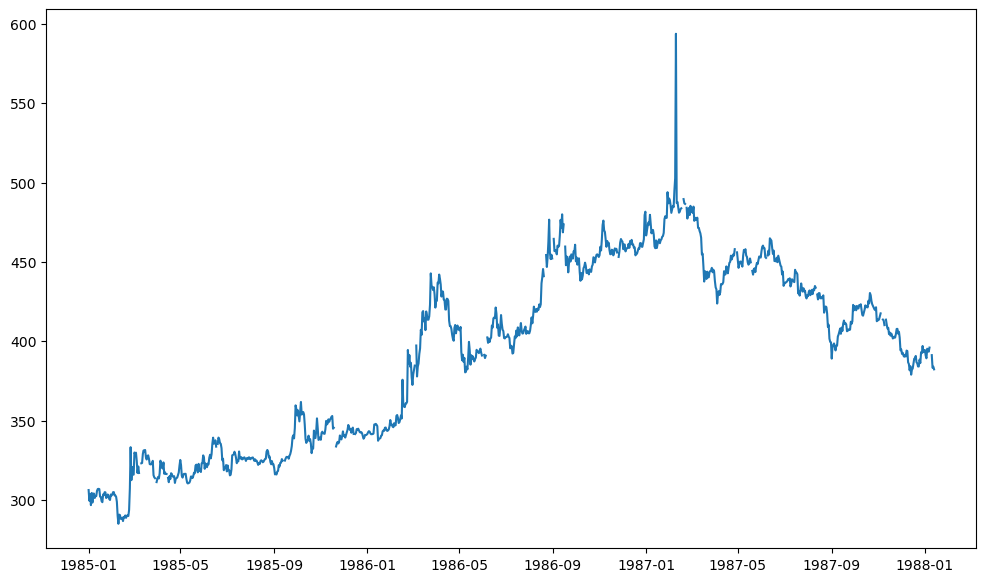

In [10]:
plt.figure(figsize=(12,7))
plt.plot(gold_price.index,gold_price.value)         # plot series
plt.show();

In [11]:
returns = 100 * gold_price['value'].pct_change().dropna()
return_sq=returns**2

Text(0, 0.5, 'returns^2')

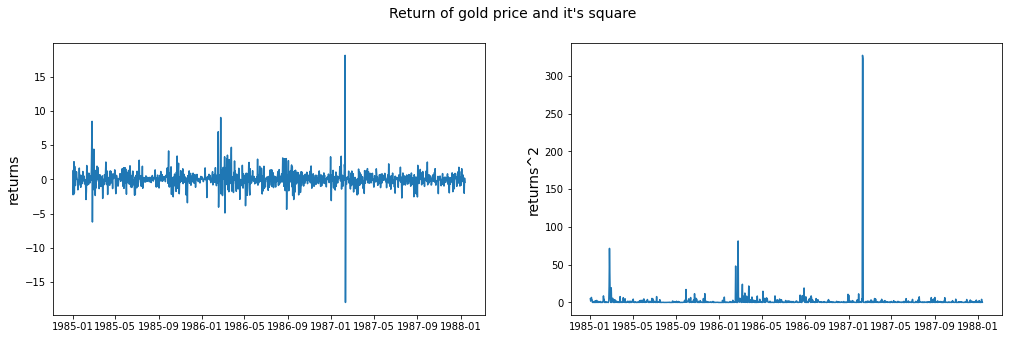

In [13]:
# plot data
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17, 5))
fig.suptitle("Return of gold price and it's square",size=14)
ax1.plot(returns)
ax1.set_ylabel('returns',size=14)
ax2.plot(return_sq)
ax2.set_ylabel('returns^2',size=14)

#### If return is white noise process with nonconstant variance, we will estimate GARCH() model on it, which is the same as to estimate ARMA() model on squares of return

C:\Users\hasmi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


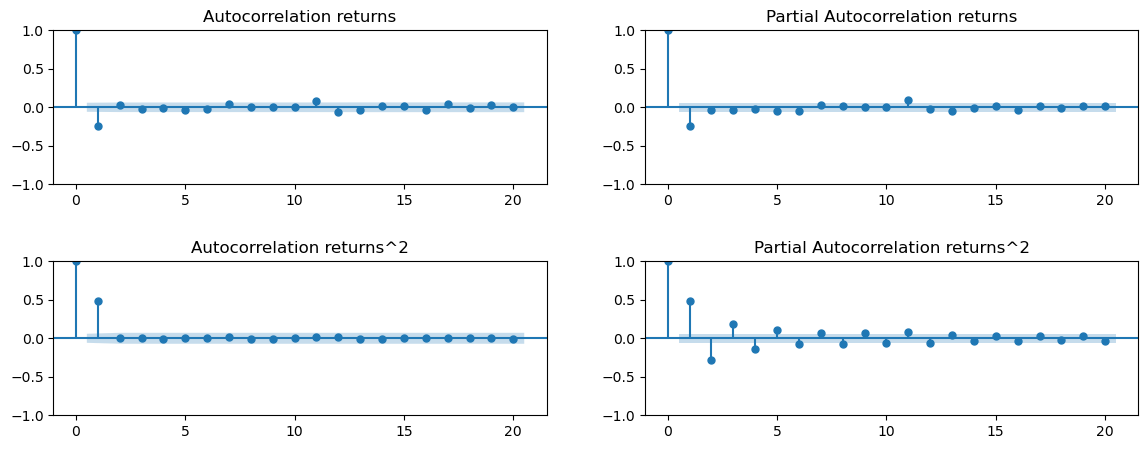

In [26]:
fig, ax = plt.subplots(2,2,figsize=(14,5))
fig.subplots_adjust(hspace = 0.5)
plot_acf(returns, lags=20, ax=ax[0,0], title = "Autocorrelation returns")
plot_pacf(returns, lags=20, ax=ax[0,1], title = "Partial Autocorrelation returns")

plot_acf(return_sq, lags=20, ax=ax[1,0],title = "Autocorrelation returns^2"),
plot_pacf(return_sq, lags=20, ax=ax[1,1], title = "Partial Autocorrelation returns^2")
plt.show()

#### From ACF and PACF of returns, we can see that we have an ARMA process. For both charts first lag is significantly different from zero. Hence, we need to constract an ARMA model and continue to work with residuals,  given that they are white noise. 

In [13]:
import pmdarima as pm

model = pm.auto_arima(returns, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=5,              # frequency of series
                      d=False,           # let model determine 'd'
                      seasonal=False,  # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

C:\Users\hasmi\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (5) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,False,1)(0,0,0)[0]             : AIC=3746.123, Time=0.54 sec
 ARIMA(0,False,0)(0,0,0)[0]             : AIC=3811.096, Time=0.05 sec
 ARIMA(1,False,0)(0,0,0)[0]             : AIC=3746.116, Time=0.13 sec
 ARIMA(0,False,1)(0,0,0)[0]             : AIC=3744.243, Time=1.16 sec
 ARIMA(0,False,2)(0,0,0)[0]             : AIC=3746.160, Time=0.13 sec
 ARIMA(1,False,2)(0,0,0)[0]             : AIC=3747.589, Time=0.60 sec
 ARIMA(0,False,1)(0,0,0)[0] intercept   : AIC=3745.223, Time=0.25 sec

Best model:  ARIMA(0,False,1)(0,0,0)[0]          
Total fit time: 2.924 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1107
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1870.122
Date:                Fri, 07 Apr 2023   AIC                           3744.243
Time:                        12:21:17   BIC                           

In [14]:
residuals = pd.DataFrame(model.resid())
residuals_sq = residuals**2
residuals.tail()

,0
index,
1988-01-09,0.039127
1988-01-10,-1.189659
1988-01-11,-2.331019
1988-01-12,-0.403374
1988-01-13,-0.544113


In [15]:
residuals_sq.head()

,0
index,
1985-01-02,4.857976
1985-01-03,0.636346
1985-01-04,4.032684
1985-01-05,4.298217
1985-01-06,2.150141


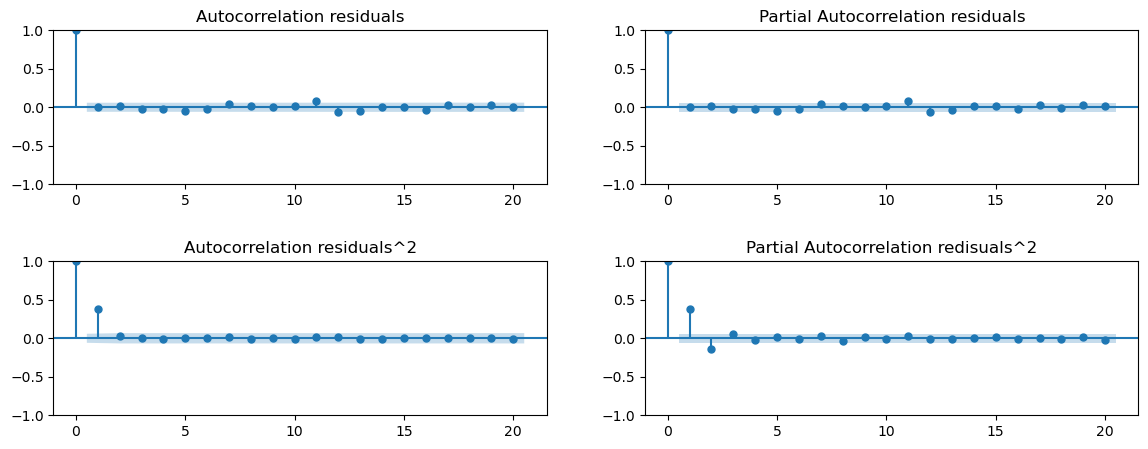

In [27]:
fig, ax = plt.subplots(2,2,figsize=(14,5))
fig.subplots_adjust(hspace = 0.5)
plot_acf(residuals, lags=20, ax=ax[0,0], title = "Autocorrelation residuals")
plot_pacf(residuals, lags=20, ax=ax[0,1], title = "Partial Autocorrelation residuals")

plot_acf(residuals_sq, lags=20, ax=ax[1,0],title = "Autocorrelation residuals^2"),
plot_pacf(residuals_sq, lags=20, ax=ax[1,1], title = "Partial Autocorrelation redisuals^2")
plt.show()

In [17]:
import pmdarima as pm

model_residuals = pm.auto_arima(residuals_sq, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=5,              # frequency of series
                      d=False,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_residuals.summary())

C:\Users\hasmi\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (5) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,False,1)(0,0,0)[0]             : AIC=8550.429, Time=0.25 sec
 ARIMA(0,False,0)(0,0,0)[0]             : AIC=8759.899, Time=0.05 sec
 ARIMA(1,False,0)(0,0,0)[0]             : AIC=8571.491, Time=0.09 sec
 ARIMA(0,False,1)(0,0,0)[0]             : AIC=8550.306, Time=0.19 sec
 ARIMA(0,False,2)(0,0,0)[0]             : AIC=8550.602, Time=0.21 sec
 ARIMA(1,False,2)(0,0,0)[0]             : AIC=inf, Time=1.51 sec
 ARIMA(0,False,1)(0,0,0)[0] intercept   : AIC=8540.261, Time=0.54 sec
 ARIMA(0,False,0)(0,0,0)[0] intercept   : AIC=8741.262, Time=0.06 sec
 ARIMA(1,False,1)(0,0,0)[0] intercept   : AIC=8541.262, Time=0.57 sec
 ARIMA(0,False,2)(0,0,0)[0] intercept   : AIC=8541.312, Time=0.79 sec
 ARIMA(1,False,0)(0,0,0)[0] intercept   : AIC=8564.447, Time=0.27 sec
 ARIMA(1,False,2)(0,0,0)[0] intercept   : AIC=8543.226, Time=0.80 sec

Best model:  ARIMA(0,False,1)(0,0,0)[0] intercept
Total fit time: 5.350 seconds
                               SARIMAX Re

### Fit the series and compare results with the return

In [18]:
residuals_estimate = model_residuals.predict_in_sample(start=0, end=1106)  
residuals_estimate = pd.DataFrame(residuals_estimate)
returns = pd.DataFrame(returns)
residuals_estimate.index = returns.index
residuals_sq.index =returns.index
returns_estimate = pd.concat([returns, residuals_estimate,residuals_sq], axis=1)
returns_estimate.columns = ['return','estimate','residuals_sq']
returns_estimate["root_est"] = np.sqrt(returns_estimate.estimate)

C:\Users\hasmi\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
returns_estimate

,return,estimate,residuals_sq,root_est
index,,,,
1985-01-02,-2.204082,1.719009,4.857976,1.311110
1985-01-03,1.318865,2.869405,0.636346,1.693932
1985-01-04,-2.207942,0.773643,4.032684,0.879570
1985-01-05,2.577928,3.132758,4.298217,1.769960
1985-01-06,-1.987516,2.226878,2.150141,1.492273
...,...,...,...,...
1988-01-09,0.000000,1.166441,0.001531,1.080019
1988-01-10,-1.199495,1.210841,1.415288,1.100382
1988-01-11,-2.031949,1.808196,5.433649,1.344692


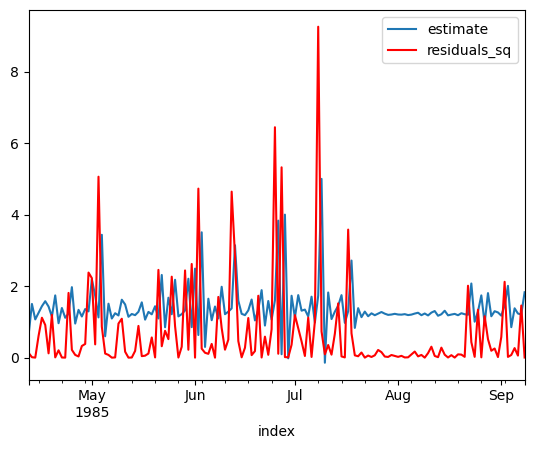

In [20]:
ax = plt.gca()

returns_estimate.iloc[100:250].plot(kind='line',y='estimate',ax=ax)
returns_estimate.iloc[100:250].plot(kind='line',y='residuals_sq', color='red', ax=ax)

plt.show()

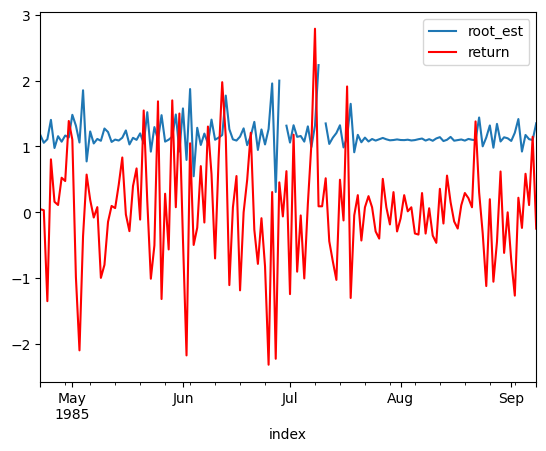

In [21]:
ax = plt.gca()

returns_estimate.iloc[110:250].plot(kind='line',y='root_est',ax=ax)
returns_estimate.iloc[110:250].plot(kind='line',y='return', color='red', ax=ax)

plt.show()

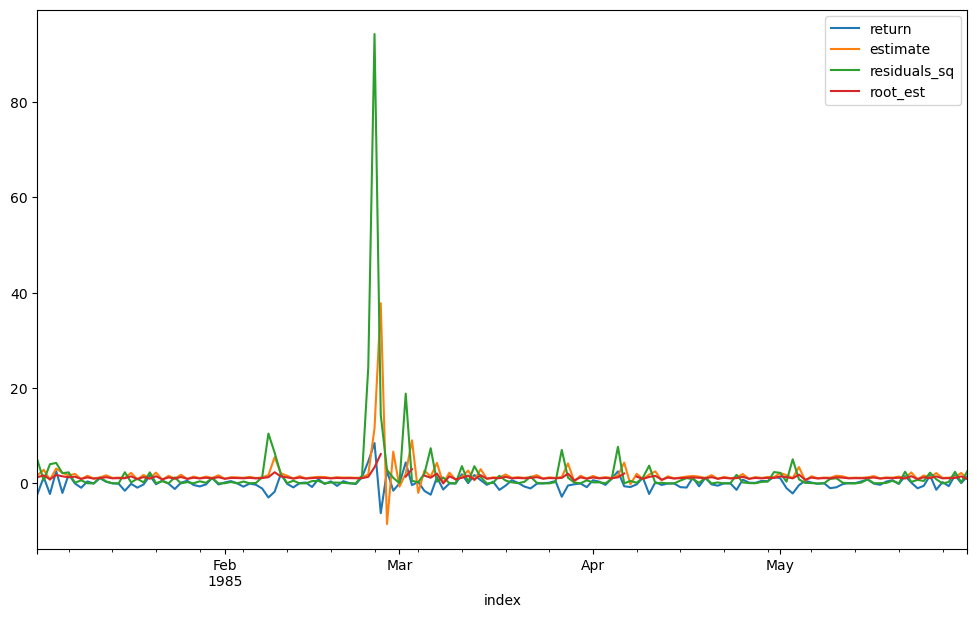

In [22]:
subplot = returns_estimate.iloc[0:150].plot(figsize = [12,7])

### GARCH model on residuals

In [23]:
from arch import arch_model

model=arch_model(residuals, mean='Zero',  vol='Garch', p=1, o=0, q=0, dist='Normal')
results=model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      4,   Neg. LLF: 2669.135421281077
Iteration:      2,   Func. Count:     11,   Neg. LLF: 1872.8465877666908
Iteration:      3,   Func. Count:     15,   Neg. LLF: 1717.9438238848957
Iteration:      4,   Func. Count:     18,   Neg. LLF: 1717.5416031232307
Iteration:      5,   Func. Count:     21,   Neg. LLF: 1717.523643613363
Iteration:      6,   Func. Count:     24,   Neg. LLF: 1717.4927283109141
Iteration:      7,   Func. Count:     27,   Neg. LLF: 1717.4927041156225
Iteration:      8,   Func. Count:     29,   Neg. LLF: 1717.4927041155815
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1717.4927041156225
            Iterations: 8
            Function evaluations: 29
            Gradient evaluations: 8
                        Zero Mean - ARCH Model Results                        
Dep. Variable:                      0   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squar

In [24]:
returns_estimate["Garch"] = list(results.conditional_volatility)

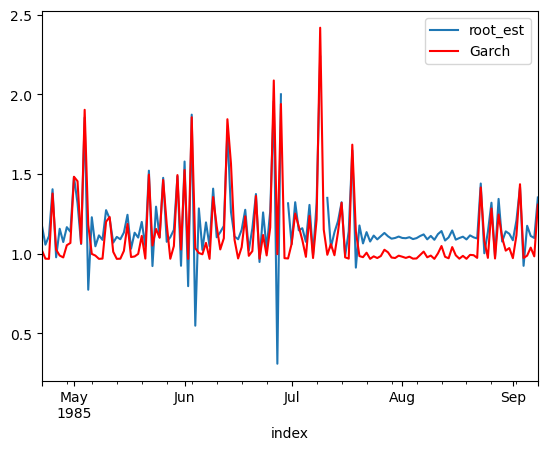

In [25]:
ax = plt.gca()

returns_estimate.iloc[110:250].plot(kind='line',y='root_est',ax=ax)
returns_estimate.iloc[110:250].plot(kind='line',y='Garch', color='red', ax=ax)

plt.show()

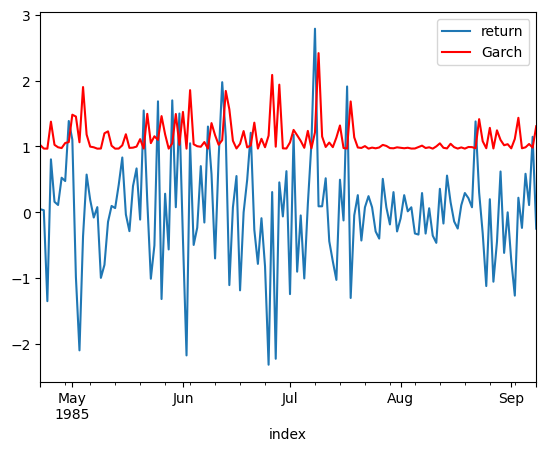

In [28]:
ax = plt.gca()

returns_estimate.iloc[110:250].plot(kind='line',y='return',ax=ax)
returns_estimate.iloc[110:250].plot(kind='line',y='Garch', color='red', ax=ax)

plt.show()

### A simple way to build an ARCH (GARCH) model consists of three steps: 

(1) build an econometric model (e.g., an ARMA model) for the return series to remove any linear dependence
in the data, and use the residual series of the model to test for ARCH (GARCH) effects

(2) specify the ARCH (GARCH) order and perform estimation 

(3) check the fitted ARCH (GARCH) model carefully and refine it if necessary

# Example 3 SP500

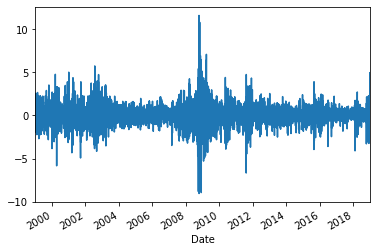

In [24]:
import datetime as dt

import arch.data.sp500

st = dt.datetime(1988, 1, 1)
en = dt.datetime(2018, 1, 1)
data = arch.data.sp500.load()
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()
returns_sq = returns**2
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

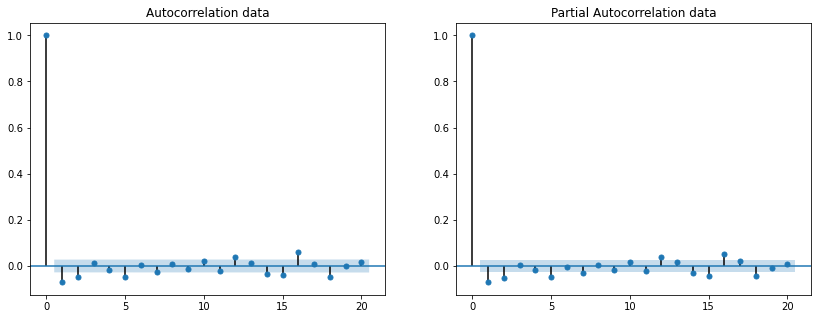

In [25]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
fig.subplots_adjust(hspace = 0.5)
plot_acf(returns, lags=20, ax=ax[0], title = "Autocorrelation data")
plot_pacf(returns, lags=20, ax=ax[1], title = "Partial Autocorrelation data")

#plot_acf(returns_sq, lags=20, ax=ax[1,0], title = "Autocorrelation data^2")
#plot_pacf(returns_sq, lags=20, ax=ax[1,1], title = "Partial Autocorrelation data^2")
plt.show()

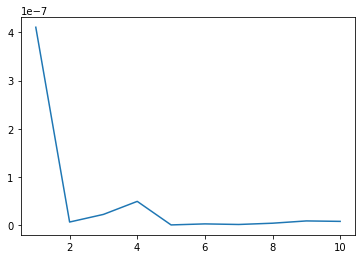

In [26]:
import statsmodels.api as sm
Lj_Box= sm.stats.acorr_ljungbox(returns, lags=10,return_df=True)
plt.plot(Lj_Box.index,Lj_Box.lb_pvalue)

In [27]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(returns)
print('ADF Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('Critical Values:')
for key, value in res[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.567060
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


### With ADF test we reject the null hypothesis of having a unit root, hence the series is stationary. For the Ljung Box test the null hypothesis assumes independence of the series, here we reject the null hypothesis and conclude that there is a serial correlation.


Ideally we would estimate an ARMA model on the series and continue with the residuals (removing the mean process). However, in this case lags which are significantly different from zero are very close to confidence intervals and most probably will lead to overfitting. We will try to model conditional variance in three ways:

1) We ignore ARMA process in the series and model returns as GARCH

2) We estimate ARMA model and GARCH on it's residuals (formally the correct way)

3) We estimate an AR(1) model for the mean and GARCH(1,1) for volatility (common way)

### 1. DIrectly model GARCH(1,1) on returns

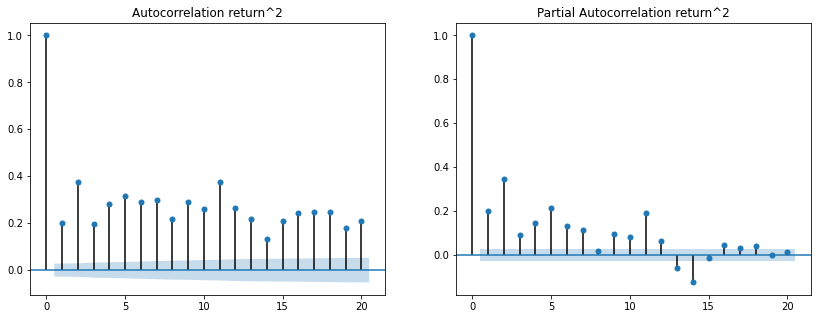

In [28]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
fig.subplots_adjust(hspace = 0.5)
#plot_acf(returns, lags=20, ax=ax[0], title = "Autocorrelation data")
#plot_pacf(returns, lags=20, ax=ax[1], title = "Partial Autocorrelation data")

plot_acf(returns_sq, lags=20, ax=ax[0], title = "Autocorrelation return^2")
plot_pacf(returns_sq, lags=20, ax=ax[1], title = "Partial Autocorrelation return^2")
plt.show()

### From ACF and PACF of return^2 it seems that first two lags are most important for PACF, and ACF shows existence of serial correlation.

In [29]:
mod_1 = arch_model(returns,mean='Zero', vol='Garch', p=1, o=0, q=1, dist='Normal')
res_1 = mod_1.fit(update_freq=5)
print(res_1.summary())

Iteration:      5,   Func. Count:     31,   Neg. LLF: 6952.795420502757
Iteration:     10,   Func. Count:     58,   Neg. LLF: 6949.008566092436
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6949.008566090573
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
                       Zero Mean - GARCH Model Results                        
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6949.01
Distribution:                  Normal   AIC:                           13904.0
Method:            Maximum Likelihood   BIC:                           13923.6
                                        No. Observations:                 5030
Date:                Sun, Apr 25 2021   Df Residuals:                     5027
Time:         

### 2. We estimate ARMA model and GARCH on it's residuals

In [30]:
import pmdarima as pm

arma_model = pm.auto_arima(returns, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=5,              # frequency of series
                      d=False,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(arma_model.summary())

Performing stepwise search to minimize aic


C:\Users\Aram\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (5) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,False,1)(0,0,0)[0]             : AIC=16099.145, Time=0.32 sec
 ARIMA(0,False,0)(0,0,0)[0]             : AIC=16137.009, Time=0.03 sec
 ARIMA(1,False,0)(0,0,0)[0]             : AIC=16113.551, Time=0.05 sec
 ARIMA(0,False,1)(0,0,0)[0]             : AIC=16110.695, Time=0.08 sec
 ARIMA(2,False,1)(0,0,0)[0]             : AIC=16102.723, Time=0.60 sec
 ARIMA(1,False,2)(0,0,0)[0]             : AIC=16102.610, Time=0.47 sec
 ARIMA(0,False,2)(0,0,0)[0]             : AIC=16100.904, Time=0.13 sec
 ARIMA(2,False,0)(0,0,0)[0]             : AIC=16100.989, Time=0.10 sec
 ARIMA(2,False,2)(0,0,0)[0]             : AIC=16100.452, Time=0.96 sec
 ARIMA(1,False,1)(0,0,0)[0] intercept   : AIC=16098.721, Time=0.83 sec
 ARIMA(0,False,1)(0,0,0)[0] intercept   : AIC=16110.809, Time=0.25 sec
 ARIMA(1,False,0)(0,0,0)[0] intercept   : AIC=16113.716, Time=0.18 sec
 ARIMA(2,False,1)(0,0,0)[0] intercept   : AIC=16102.711, Time=1.50 sec
 ARIMA(1,False,2)(0,0,0)[0] intercept   : AIC=16102.558, Time=1.04 sec
 ARIMA

#### The auto_arma model suggests ARMA(1,1), the coefficients for AR amd MA parts are significant. 

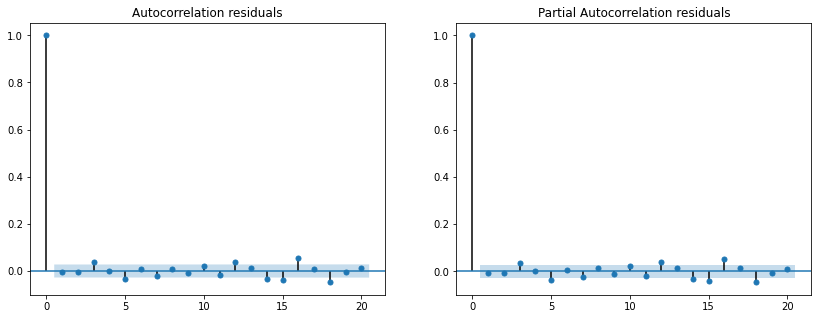

In [31]:
residuals_arma = arma_model.resid()

fig, ax = plt.subplots(1,2,figsize=(14,5))
fig.subplots_adjust(hspace = 0.5)

plot_acf(residuals_arma, lags=20, ax=ax[0], title = "Autocorrelation residuals")
plot_pacf(residuals_arma, lags=20, ax=ax[1], title = "Partial Autocorrelation residuals")
plt.show()

#### From ACF and PACF it seems to be white noise. We can test it by Ljung Box test

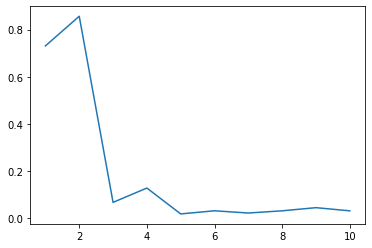

In [32]:
Lj_Box= sm.stats.acorr_ljungbox(residuals_arma, lags=10,return_df=True)
plt.plot(Lj_Box.index,Lj_Box.lb_pvalue)

#### From the first two p-values of Ljung Box test, we conclude that there is no serial correlation anymore. Now, consider the square of residuals.

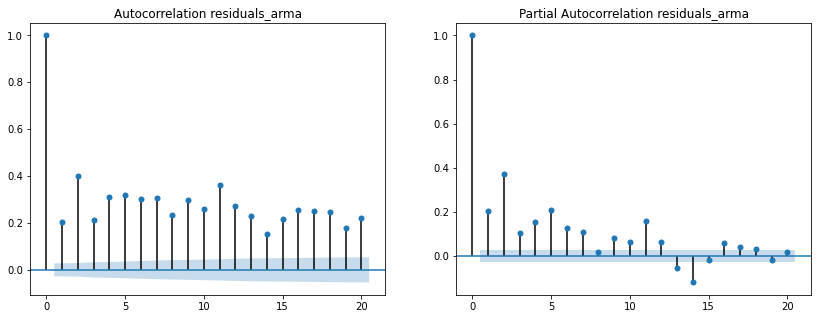

In [33]:
residuals_arma_sq = residuals_arma**2
fig, ax = plt.subplots(1,2,figsize=(14,5))
fig.subplots_adjust(hspace = 0.5)

plot_acf(residuals_arma_sq, lags=20, ax=ax[0], title = "Autocorrelation residuals_arma")
plot_pacf(residuals_arma_sq, lags=20, ax=ax[1], title = "Partial Autocorrelation residuals_arma")
plt.show()

#### From PACF we notice that first two lags are relatively important, from ACF it is not that clear, we can assume that there is an moving average process.

In [34]:
model_res_arma = arch_model(residuals_arma, mean='Zero', vol='Garch', p=1, o=0, q=1, dist='Normal')
res_arma = model_res_arma.fit(update_freq=5)
print(res_arma.summary())

Iteration:      5,   Func. Count:     31,   Neg. LLF: 6937.063146698401
Iteration:     10,   Func. Count:     57,   Neg. LLF: 6933.037823168285
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6933.037818499779
            Iterations: 11
            Function evaluations: 62
            Gradient evaluations: 11
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6933.04
Distribution:                  Normal   AIC:                           13872.1
Method:            Maximum Likelihood   BIC:                           13891.6
                                        No. Observations:                 5030
Date:                Sun, Apr 25 2021   Df Residuals:                     5027
Time:         

### 3. Model with AR(1) the mean and with GARCH(1,1) volatility

In [35]:
mod_3 = arch_model(returns,mean='AR', lags= 1, vol='Garch', p=1, o=0, q=1, dist='Normal')
res_ar_garch = mod_3.fit(update_freq=5)
print(res_ar_garch.summary())

Iteration:      5,   Func. Count:     46,   Neg. LLF: 6939.125515651263
Iteration:     10,   Func. Count:     86,   Neg. LLF: 6928.718836763652
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6928.714263244774
            Iterations: 13
            Function evaluations: 108
            Gradient evaluations: 13
                           AR - GARCH Model Results                           
Dep. Variable:              Adj Close   R-squared:                       0.004
Mean Model:                        AR   Adj. R-squared:                  0.004
Vol Model:                      GARCH   Log-Likelihood:               -6928.71
Distribution:                  Normal   AIC:                           13867.4
Method:            Maximum Likelihood   BIC:                           13900.0
                                        No. Observations:                 5029
Date:                Sun, Apr 25 2021   Df Residuals:                     5024
Time:        

In [36]:
res_1.conditional_volatility     # results on return
res_arma.conditional_volatility  # results on residuals of arma
final = pd.concat([returns, res_1.conditional_volatility], 1)
final['res_arma_fit'] = np.sqrt(res_arma.conditional_volatility.tolist())
final = final.rename(columns={ 'Adj Close':'Returns',  'cond_vol':'GARCH(1,1)','res_arma_fit':'ARMA(1,1)-GARCH(1,1)'})
final = pd.concat([final, res_ar_garch.conditional_volatility], 1)
final = final.rename(columns={ 'cond_vol':'AR(1)-GARCH(1,1)'})

final.head()

,Returns,"GARCH(1,1)","ARMA(1,1)-GARCH(1,1)","AR(1)-GARCH(1,1)"
Date,,,,
1999-01-05,1.358200,1.346746,1.155708,NaN
1999-01-06,2.214041,1.345741,1.154904,1.352754
1999-01-07,-0.205133,1.452055,1.204779,1.463898
1999-01-08,0.422136,1.377089,1.172926,1.384884
1999-01-11,-0.879151,1.311901,1.146808,1.314887


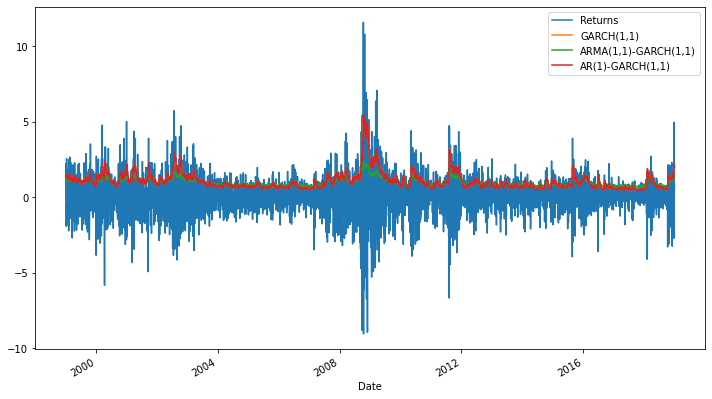

In [37]:
subplot = final.plot(figsize = [12,7])

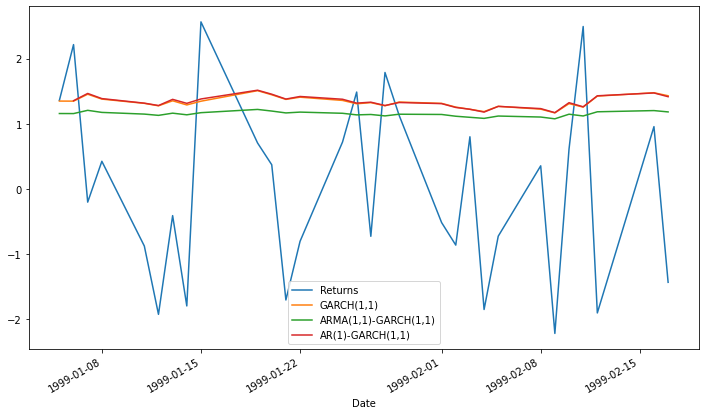

In [38]:
subplot = final.iloc[0:30].plot(figsize = [12,7])

In [39]:
final.corr()

,Returns,"GARCH(1,1)","ARMA(1,1)-GARCH(1,1)","AR(1)-GARCH(1,1)"
Returns,1.000000,0.008789,0.011621,0.011063
"GARCH(1,1)",0.008789,1.000000,0.981510,0.999524
"ARMA(1,1)-GARCH(1,1)",0.011621,0.981510,1.000000,0.982609
"AR(1)-GARCH(1,1)",0.011063,0.999524,0.982609,1.000000


### Why are the estimates so similar?  Lets check what we are left with after ARMA model

In [40]:
comparison = returns
comparison = comparison.to_frame()
fit = arma_model.predict_in_sample()
comparison['ARMA(1,1)'] = fit
comparison['Residuals'] = residuals_arma.tolist()
comparison = comparison.rename(columns={ 'Adj Close':'Returns'})

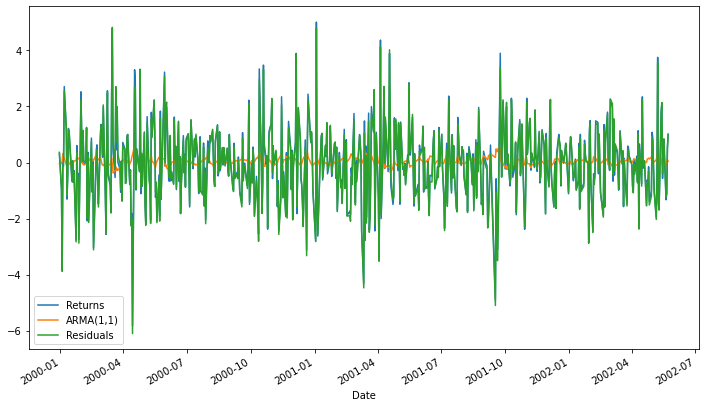

In [41]:
subplot = comparison.iloc[250:850].plot(figsize = [12,7])

# Forecasting



https://www.sciencedirect.com/science/article/pii/S1877042812036129

https://silo.tips/download/volatility-forecasting-performance-evaluation-of-garch-type-volatility-models-on

In [42]:
returns.tail()

Date
2018-12-24   -2.711225
2018-12-26    4.959374
2018-12-27    0.856268
2018-12-28   -0.124158
2018-12-31    0.849248
Name: Adj Close, dtype: float64

In [43]:
forecasts = res_ar_garch.forecast(horizon=25)

In [44]:
print(forecasts.variance.dropna().head())

                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2018-12-31  3.621791  3.604504  3.577051  3.549909  3.523103  3.496631   

                h.07     h.08      h.09      h.10  ...      h.16      h.17  \
Date                                               ...                       
2018-12-31  3.470488  3.44467  3.419172  3.393991  ...  3.249342  3.226271   

                h.18      h.19      h.20      h.21      h.22      h.23  \
Date                                                                     
2018-12-31  3.203487  3.180986  3.158765  3.136819  3.115146  3.093743   

                h.24     h.25  
Date                           
2018-12-31  3.072605  3.05173  

[1 rows x 25 columns]


## IGARCH

If the AR polynomial of the GARCH representation has a unit root, then we have an IGARCH model. Thus, IGARCH models are unit-root GARCH models. Similar to ARIMA models, a key feature of IGARCH models is that the impact of past squared shocks $\eta_{t-i}=a_{t-i}^{2}-\sigma_{t-i}^{2}$ for $i>0$ on $a_{t}^{2}$ is persistent. An IGARCH(1, 1) model can be written as

$$
a_{t}=\sigma_{t} \epsilon_{t}, \quad \sigma_{t}^{2}=\alpha_{0}+\beta_{1} \sigma_{t-1}^{2}+\left(1-\beta_{1}\right) a_{t-1}^{2}
$$

where $\left\{\epsilon_{t}\right\}$ is defined as before and $1>\beta_{1}>0$. For the monthly excess returns of

## GARCH-M

In finance, the return of a security may depend on its volatility. To model such a phenomenon, one may consider the GARCH-M model, where "M" stands for GARCH in mean. A simple GARCH(1, 1)-M model can be written as

$$
\begin{aligned}
r_{t} &=\mu+c \sigma_{t}^{2}+a_{t}, \quad a_{t}=\sigma_{t} \epsilon_{t}, \\
\sigma_{t}^{2} &=\alpha_{0}+\alpha_{1} a_{t-1}^{2}+\beta_{1} \sigma_{t-1}^{2}
\end{aligned}
$$

where $\mu$ and $c$ are constant. The parameter $c$ is called the risk premium parameter. A positive $c$ indicates that the return is positively related to its past volatility. Other

## EGARCH

To overcome some weaknesses of the GARCH model in handling financial time series, Nelson (1991) proposes the exponential GARCH (EGARCH) model. In particular, to allow for asymmetric effects between positive and negative asset returns, he considers the weighted innovation

$$
g\left(\epsilon_{t}\right)=\theta \epsilon_{t}+\gamma\left[\left|\epsilon_{t}\right|-E\left(\left|\epsilon_{t}\right|\right)\right]
$$

where $\theta$ and $\gamma$ are real constants. Both $\epsilon_{t}$ and $\left|\epsilon_{t}\right|-E\left(\left|\epsilon_{t}\right|\right)$ are zero-mean iid sequences with continuous distributions. Therefore, $E\left[g\left(\epsilon_{t}\right)\right]=0 .$ The asymmetry of $g\left(\epsilon_{t}\right)$ can easily be seen by rewriting it as

$$
g\left(\epsilon_{t}\right)=\left\{\begin{array}{ll}
(\theta+\gamma) \epsilon_{t}-\gamma E\left(\left|\epsilon_{t}\right|\right) & \text { if } \epsilon_{t} \geq 0 \\
(\theta-\gamma) \epsilon_{t}-\gamma E\left(\left|\epsilon_{t}\right|\right) & \text { if } \epsilon_{t}<0
\end{array}\right.
$$

An EGARCH $(m, s)$ model can be written as

$$
a_{t}=\sigma_{t} \epsilon_{t}, \quad \ln \left(\sigma_{t}^{2}\right)=\alpha_{0}+\frac{1+\beta_{1} B+\cdots+\beta_{s} B^{s}}{1-\alpha_{1} B-\cdots-\alpha_{m} B^{m}} g\left(\epsilon_{t-1}\right),
$$

where $\alpha_{0}$ is a constant, $B$ is the back-shift (or lag) operator such that $B g\left(\epsilon_{t}\right)=$ $g\left(\epsilon_{t-1}\right)$, and $1+\beta_{1} B+\cdots+\beta_{s} B^{s}$ and $1-\alpha_{1} B-\cdots-\alpha_{m} B^{m}$ are polynomials
with zeros outside the unit circle and have no common factors. By outside the unit circle, we mean that absolute values of the zeros are greater than $1 .$ 

### As an alternative resource check the following book
Analysis of Financial Time Series by Ruey S. TSAY

Chapter 3 pp 102-149

https://cpb-us-w2.wpmucdn.com/blog.nus.edu.sg/dist/0/6796/files/2017/03/analysis-of-financial-time-series-copy-2ffgm3v.pdf

In [45]:
final['Returns^2'] = final['Returns']**2

In [46]:
final

,Returns,"GARCH(1,1)","ARMA(1,1)-GARCH(1,1)","AR(1)-GARCH(1,1)",Returns^2
Date,,,,,
1999-01-05,1.358200,1.346746,1.155708,NaN,1.844707
1999-01-06,2.214041,1.345741,1.154904,1.352754,4.901976
1999-01-07,-0.205133,1.452055,1.204779,1.463898,0.042079
1999-01-08,0.422136,1.377089,1.172926,1.384884,0.178199
1999-01-11,-0.879151,1.311901,1.146808,1.314887,0.772906
...,...,...,...,...,...
2018-12-24,-2.711225,1.464592,1.253351,1.532188,7.350743
2018-12-26,4.959374,1.626564,1.330849,1.714907,24.595393
2018-12-27,0.856268,2.186856,1.478479,2.218276,0.733195


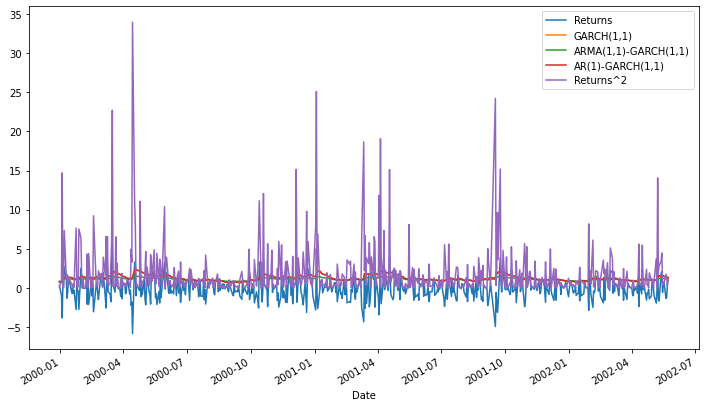

In [47]:
subplot = final.iloc[250:850].plot(figsize = [12,7])

In [48]:
final.corr()

,Returns,"GARCH(1,1)","ARMA(1,1)-GARCH(1,1)","AR(1)-GARCH(1,1)",Returns^2
Returns,1.000000,0.008789,0.011621,0.011063,0.004710
"GARCH(1,1)",0.008789,1.000000,0.981510,0.999524,0.450031
"ARMA(1,1)-GARCH(1,1)",0.011621,0.981510,1.000000,0.982609,0.419126
"AR(1)-GARCH(1,1)",0.011063,0.999524,0.982609,1.000000,0.452994
Returns^2,0.004710,0.450031,0.419126,0.452994,1.000000
